#### For this challenge you are given the purchase history of customers across time, along with supporting metadata. Your challenge is to predict what articles each customer will purchase in the 7-day period immediately after the training data ends. Customer who did not make any purchase during that time are excluded from the scoring.

import lib all the library necessary.

In [61]:
import numpy as np
import pandas as pd
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
# from wordcloud import WordCloud, STOPWORDS
from datetime import datetime
from PIL import Image
from plotnine import *

In [62]:
print(f"files and folders : {os.listdir('../Dataset/HandM')}")

files and folders : ['articles.csv', 'customers.csv', 'h-and-m-personalized-fashion-recommendations.zip', 'images', 'sample_submission.csv', 'transactions_train.csv']


In [63]:
print(f"sub-folders inside images : {os.listdir('../Dataset/HandM/images')}")

sub-folders inside images : ['010', '011', '012', '013', '014', '015', '016', '017', '018', '019', '020', '021', '022', '023', '024', '025', '026', '027', '028', '029', '030', '031', '032', '033', '034', '035', '036', '037', '038', '039', '040', '041', '042', '043', '044', '045', '046', '047', '048', '049', '050', '051', '052', '053', '054', '055', '056', '057', '058', '059', '060', '061', '062', '063', '064', '065', '066', '067', '068', '069', '070', '071', '072', '073', '074', '075', '076', '077', '078', '079', '080', '081', '082', '083', '084', '085', '086', '087', '088', '089', '090', '091', '092', '093', '094', '095']


In [64]:
print(f"and there are total of  : {len(os.listdir('../Dataset/HandM/images'))}")

and there are total of  : 86


In [66]:
total_folders = total_files = 0
folder_info = []
images_names = []
for base, dirs, files in tqdm(os.walk('../Dataset/HandM/')):
    for directories in dirs:
        folder_info.append((directories, len(os.listdir(os.path.join(base, directories)))))
        total_folders += 1
    for _files in files:
        total_files += 1
        if len(_files.split(".jpg"))==2:
            images_names.append(_files.split(".jpg")[0])

88it [00:00, 338.05it/s]


In [67]:
print(f"Total number of folders: {total_folders}\nTotal number of files including images: {total_files}")

Total number of folders: 87
Total number of files including images: 105105


In [8]:
folder_info_df = pd.DataFrame(folder_info,columns=["folder_name","files_count"])
folder_info_df = folder_info_df.drop(0)

In [9]:
folder_info_df.sort_values(by='files_count',ascending=False).head()

folder_name  files_count
60         069         4187
64         073         3438
53         062         3361
59         068         3313
61         070         3309

please find out what is inside the folder and give the number its proper name

In [71]:
articles_df = pd.read_csv("../Dataset/HandM/articles.csv")
customers_df = pd.read_csv("../Dataset/HandM/customers.csv")
sample_submission_df = pd.read_csv("../Dataset/HandM/sample_submission.csv")
transaction_train = pd.read_csv("../Dataset/HandM/transactions_train.csv")

In [73]:
transaction_train.dtypes

t_dat                object
customer_id          object
article_id            int64
price               float64
sales_channel_id      int64
dtype: object

### lets explore articles! 

##### percent_missing within article_df

Percent missing for cutomer dataframe

In [14]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [68]:
articles_df.shape

(105542, 25)

In [15]:
missing_data(articles_df)

Total   Percent
detail_desc                     416  0.394156
perceived_colour_master_name      0  0.000000
garment_group_name                0  0.000000
garment_group_no                  0  0.000000
section_name                      0  0.000000
section_no                        0  0.000000
index_group_name                  0  0.000000
index_group_no                    0  0.000000
index_name                        0  0.000000
index_code                        0  0.000000
department_name                   0  0.000000
department_no                     0  0.000000
article_id                        0  0.000000
product_code                      0  0.000000
perceived_colour_value_name       0  0.000000
perceived_colour_value_id         0  0.000000
colour_group_name                 0  0.000000
colour_group_code                 0  0.000000
graphical_appearance_name         0  0.000000
graphical_appearance_no           0  0.000000
product_group_name                0  0.000000
product_type_name                 0  0.000000
product_type_no                   0  0.000000
prod_name                         0  0.000000
perceived_colour_master_id        0  0.000000

In [69]:
missing_data(customers_df)

Total    Percent
Active                  907576  66.150819
FN                      895050  65.237831
fashion_news_frequency   16009   1.166854
age                      15861   1.156066
club_member_status        6062   0.441843
customer_id                  0   0.000000
postal_code                  0   0.000000

In [81]:
def unique_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    uniques = []
    for col in data.columns:
        unique = data[col].nunique()
        uniques.append(unique)
    tt['Uniques'] = uniques
    return tt.sort_values("Uniques",ascending=False)

We have 105542 unique article that customer could purchase.

we can sort by different columns name. 

The least amount os uniques is "index_group_name"


In [82]:
unique_values(articles_df)

Total  Uniques
article_id                    105542   105542
product_code                  105542    47224
prod_name                     105542    45875
detail_desc                   105126    43404
department_no                 105542      299
department_name               105542      250
product_type_no               105542      132
product_type_name             105542      131
section_no                    105542       57
section_name                  105542       56
colour_group_code             105542       50
colour_group_name             105542       50
graphical_appearance_name     105542       30
graphical_appearance_no       105542       30
garment_group_name            105542       21
garment_group_no              105542       21
perceived_colour_master_id    105542       20
perceived_colour_master_name  105542       20
product_group_name            105542       19
index_name                    105542       10
index_code                    105542       10
perceived_colour_value_name   105542        8
perceived_colour_value_id     105542        8
index_group_no                105542        5
index_group_name              105542        5

### I am going to make 2-3 plots regarding each columns

### 5 major category that H&M index their products. 

In [18]:
articles_df.index_group_name.unique()

array(['Ladieswear', 'Baby/Children', 'Menswear', 'Sport', 'Divided'],
      dtype=object)

#### Divided indicate outer waers for teenagers, can be both male and female

In [112]:
temp = articles_df.groupby(["index_group_name"])["article_id"].nunique()
df = pd.DataFrame({'Product_Type': temp.index,
                   'Articles': temp.values
                  })

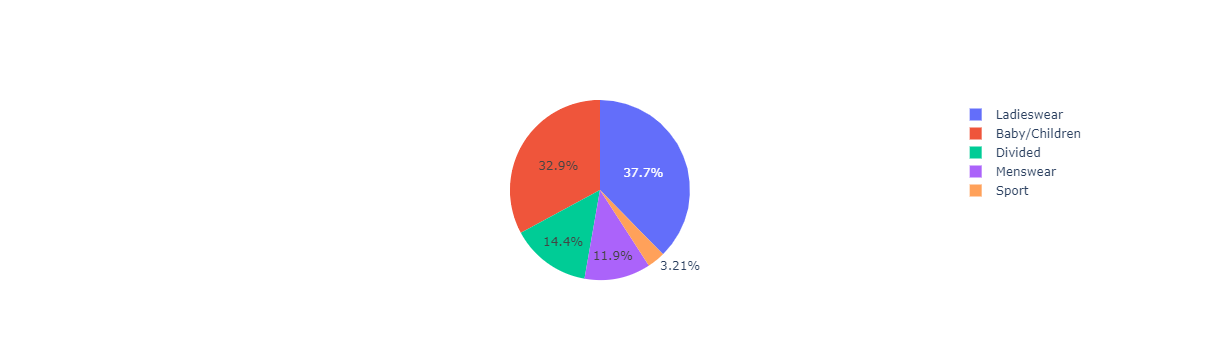

In [113]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Pie(labels=df.Product_Type, values=df.Articles)])
fig.show()

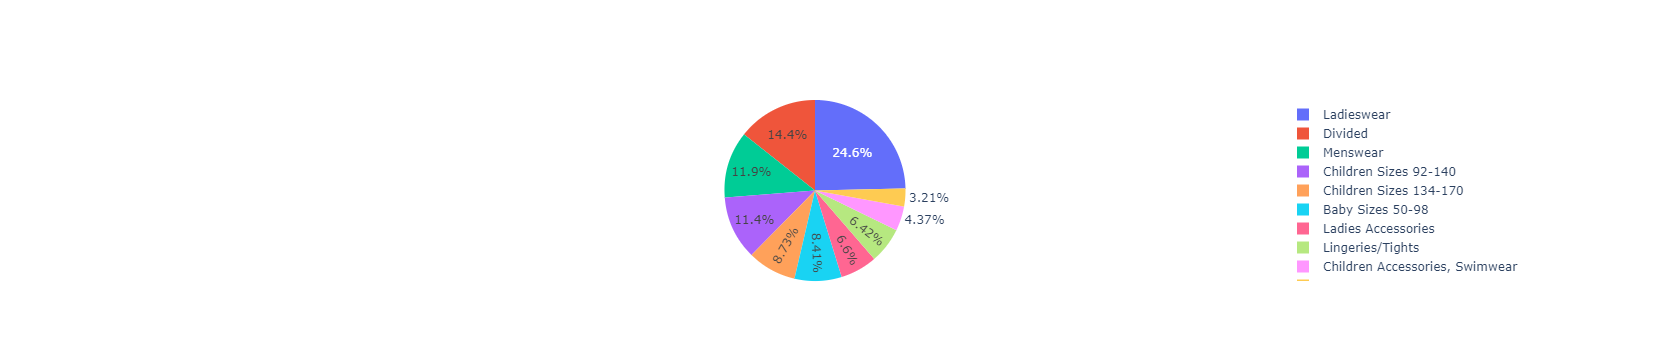

In [147]:
index_name = articles_df.groupby('index_name')['article_id'].nunique().sort_values(ascending=False)
df = pd.DataFrame({'index_name': index_name.index,
                   'articles_count': index_name.values
                  })
fig = go.Figure(data=[go.Pie(labels=df.index_name, values=df.articles_count)])
fig.show()


In [122]:
temp = articles_df.groupby(["perceived_colour_value_name"])["article_id"].nunique()
df = pd.DataFrame({'color': temp.index,
                   'articles_count': temp.values
                  })
df = df.sort_values("articles_count", ascending = False)
df

color  articles_count
1          Dark           42706
2   Dusty Light           22152
3         Light           15739
5  Medium Dusty           12630
0        Bright            6471
4        Medium            5711
6     Undefined             105
7       Unknown              28

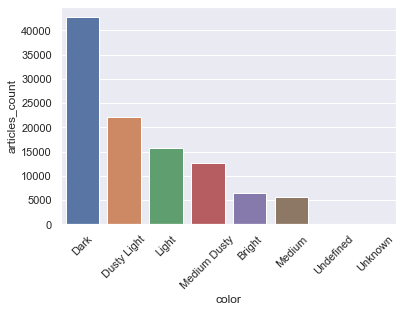

In [123]:
sns.set()
p = sns.barplot(x="color", y="articles_count", data=df)
plt.xticks(rotation=45)
plt.show()

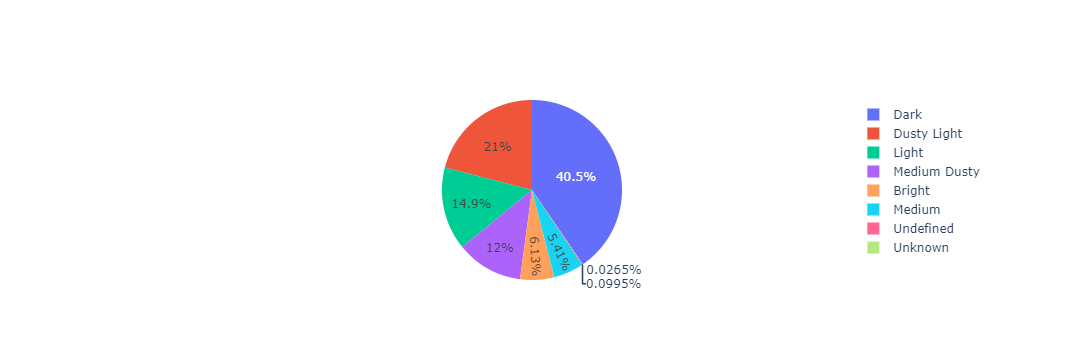

In [124]:
fig = go.Figure(data=[go.Pie(labels=df.color, values=df.articles_count)])
fig.show()

Its predominantly dark color.

In [116]:
df.loc[df['color']!='Dark', 'darkOrOther'] = 'Other'
df.loc[df['color']=='Dark', 'darkOrOther'] = 'Dark'
temp = df.groupby('darkOrOther')['articles_count'].sum()
df = pd.DataFrame({'darkOrOther': temp.index,
                   'articles_count': temp.values
                  })
df

darkOrOther  articles_count
0        Dark           42706
1       Other           62836

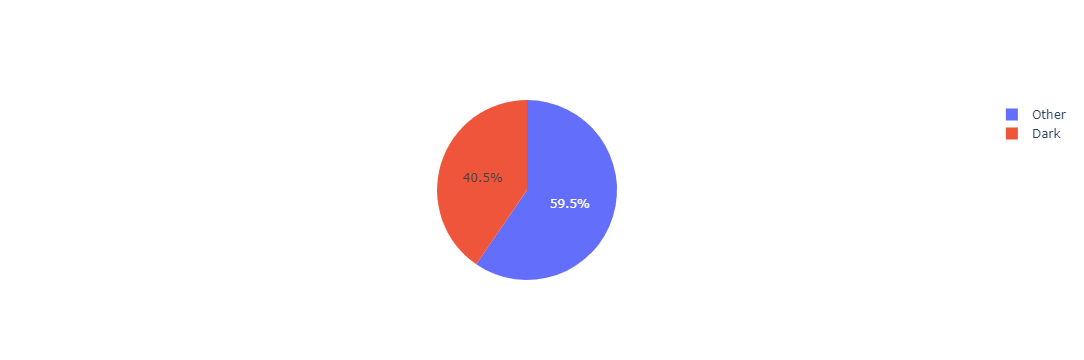

In [121]:
fig = go.Figure(data=[go.Pie(labels=df.darkOrOther, values=df.articles_count)])
fig.show()

Within colors that is not Dark, i want to see the porprotion

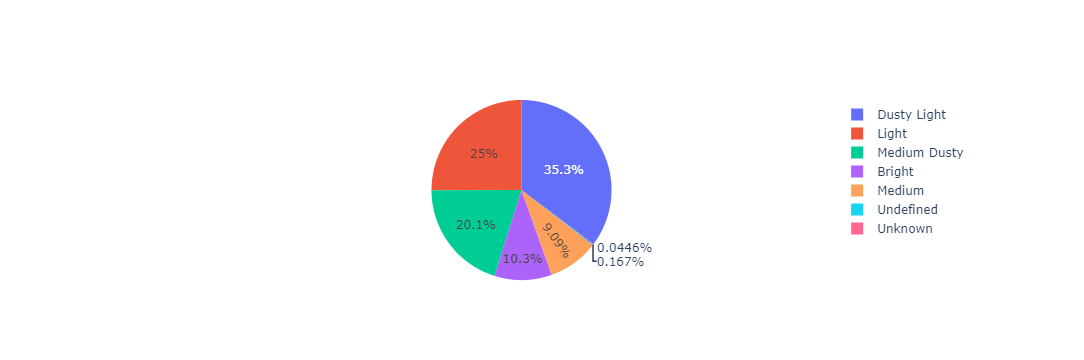

In [130]:
temp = articles_df.groupby(["perceived_colour_value_name"])["article_id"].nunique()
df = pd.DataFrame({'color': temp.index,
                   'articles_count': temp.values
                  })
df = df.sort_values("articles_count", ascending = False)
df = df.loc[df['color'] != 'Dark']
fig = go.Figure(data=[go.Pie(labels=df.color, values=df.articles_count)])
fig.show()

In [146]:
index_name = articles_df.groupby('index_name')['article_id'].nunique().sort_values(ascending=False)
df = pd.DataFrame({'index_name': index_name.index,
                   'articles_count': index_name.values
                  })
df

index_name  articles_count
0                      Ladieswear           26001
1                         Divided           15149
2                        Menswear           12553
3           Children Sizes 92-140           12007
4          Children Sizes 134-170            9214
5                Baby Sizes 50-98            8875
6              Ladies Accessories            6961
7                Lingeries/Tights            6775
8  Children Accessories, Swimwear            4615
9                           Sport            3392

In [131]:
articles_df.columns

Index(['article_id', 'product_code', 'prod_name', 'product_type_no',
       'product_type_name', 'product_group_name', 'graphical_appearance_no',
       'graphical_appearance_name', 'colour_group_code', 'colour_group_name',
       'perceived_colour_value_id', 'perceived_colour_value_name',
       'perceived_colour_master_id', 'perceived_colour_master_name',
       'department_no', 'department_name', 'index_code', 'index_name',
       'index_group_no', 'index_group_name', 'section_no', 'section_name',
       'garment_group_no', 'garment_group_name', 'detail_desc'],
      dtype='object')

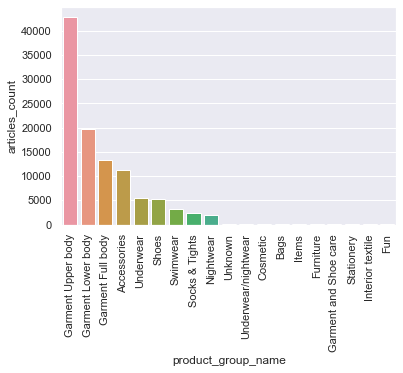

In [141]:
#potentially encode group the following group 
product_group = articles_df.groupby('product_group_name')['article_id'].nunique().sort_values(ascending=False)
df = pd.DataFrame({'product_group_name': product_group.index,
                   'articles_count': product_group.values
                  })
p = sns.barplot(x="product_group_name", y='articles_count', data=df)
plt.xticks(rotation=90)
plt.show()

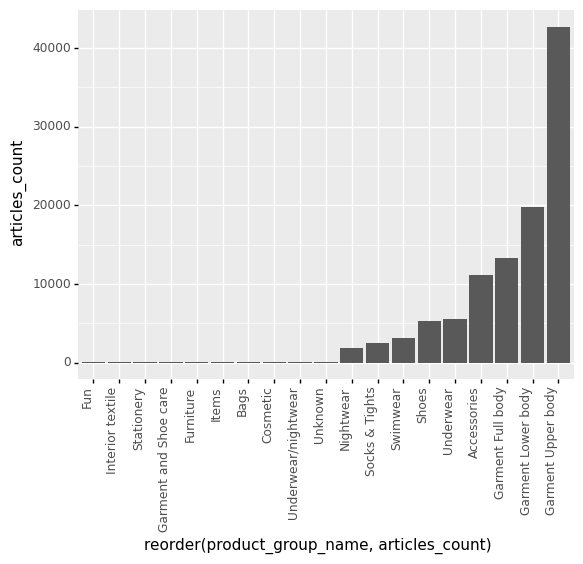

<ggplot: (132474637662)>

In [145]:
(ggplot(df, aes('reorder(product_group_name, articles_count)','articles_count'))
        + theme(axis_text_x  = element_text(angle = 90, hjust = 1))
        + geom_col())

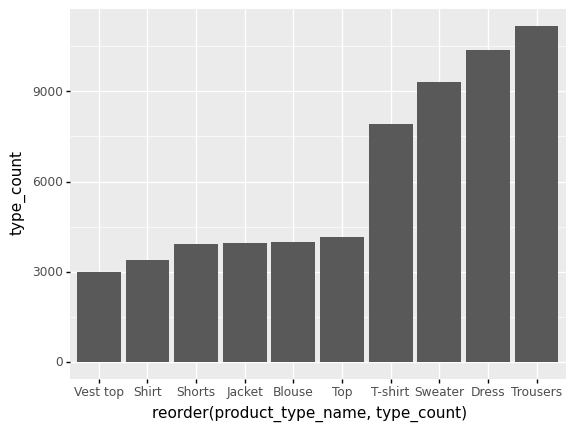

<ggplot: (132513765187)>

In [26]:
(ggplot(product_type_count.head(10), aes('reorder(product_type_name, type_count)','type_count'))
        + geom_col())

foudn out the Top of articles type are always 40% of entire sale. 

In [31]:
articles_df.columns

Index(['article_id', 'product_code', 'prod_name', 'product_type_no',
       'product_type_name', 'product_group_name', 'graphical_appearance_no',
       'graphical_appearance_name', 'colour_group_code', 'colour_group_name',
       'perceived_colour_value_id', 'perceived_colour_value_name',
       'perceived_colour_master_id', 'perceived_colour_master_name',
       'department_no', 'department_name', 'index_code', 'index_name',
       'index_group_no', 'index_group_name', 'section_no', 'section_name',
       'garment_group_no', 'garment_group_name', 'detail_desc'],
      dtype='object')

In [32]:
articles_df.product_group_name.unique()

array(['Garment Upper body', 'Underwear', 'Socks & Tights',
       'Garment Lower body', 'Accessories', 'Items', 'Nightwear',
       'Unknown', 'Underwear/nightwear', 'Shoes', 'Swimwear',
       'Garment Full body', 'Cosmetic', 'Interior textile', 'Bags',
       'Furniture', 'Garment and Shoe care', 'Fun', 'Stationery'],
      dtype=object)

In [33]:
articles_df.graphical_appearance_name

0                   Solid
1                   Solid
2                  Stripe
3                   Solid
4                   Solid
               ...       
105537    Placement print
105538              Solid
105539              Solid
105540              Solid
105541              Solid
Name: graphical_appearance_name, Length: 105542, dtype: object

In [34]:
product_group_count = articles_df.groupby(by=["product_group_name"])['article_id'].count().sort_values(ascending=False).reset_index()
product_group_count.columns = ['product_group_name', 'count']

In [35]:
product_group_count.head()

product_group_name  count
0  Garment Upper body  42741
1  Garment Lower body  19812
2   Garment Full body  13292
3         Accessories  11158
4           Underwear   5490

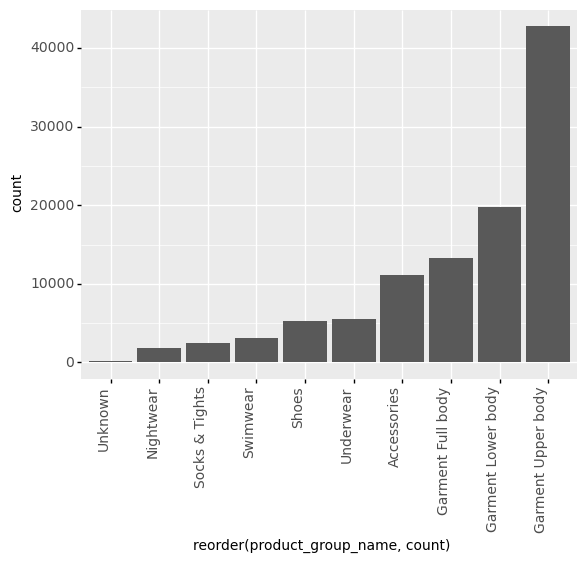

<ggplot: (132474214726)>

In [179]:
(ggplot(product_group_count.head(10), aes('reorder(product_group_name, count)','count'))
        + geom_col()
        + theme(text = element_text(size=10),axis_text_x=element_text(rotation=90, hjust=1))
)


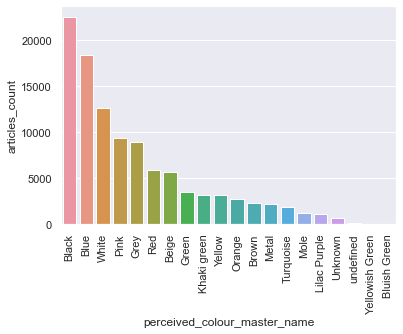

In [148]:
#potentially encode group the following group 
color_master = articles_df.groupby('perceived_colour_master_name')['article_id'].nunique().sort_values(ascending=False)
df = pd.DataFrame({'perceived_colour_master_name': color_master.index,
                   'articles_count': color_master.values
                  })
p = sns.barplot(x="perceived_colour_master_name", y='articles_count', data=df)
plt.xticks(rotation=90)
plt.show()

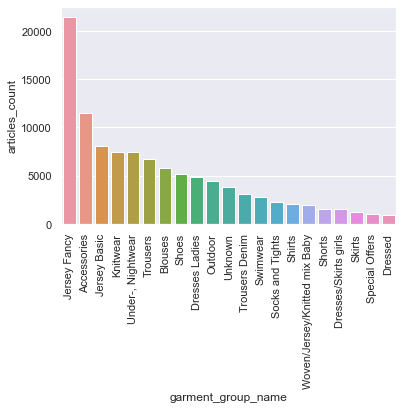

In [149]:
#potentially encode group the following group 
garment_group = articles_df.groupby('garment_group_name')['article_id'].nunique().sort_values(ascending=False)
df = pd.DataFrame({'garment_group_name': garment_group.index,
                   'articles_count': garment_group.values
                  })
p = sns.barplot(x="garment_group_name", y='articles_count', data=df)
plt.xticks(rotation=90)
plt.show()

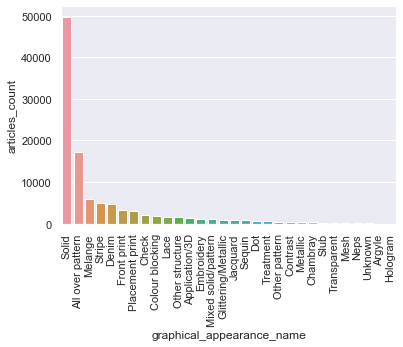

In [159]:
#potentially encode group the following group 
graphical_appearance = articles_df.groupby('graphical_appearance_name')['article_id'].nunique().sort_values(ascending=False)
df = pd.DataFrame({'graphical_appearance_name': graphical_appearance.index,
                   'articles_count': graphical_appearance.values
                  })
p = sns.barplot(x="graphical_appearance_name", y='articles_count', data=df)
plt.xticks(rotation=90)
plt.show()

In [161]:
df.loc[df['graphical_appearance_name']!='Solid', 'SolidOrOther'] = 'Other'
df.loc[df['graphical_appearance_name']=='Solid', 'SolidOrOther'] = 'Solid'
df = df.groupby('SolidOrOther')['articles_count'].sum()
df = pd.DataFrame({'SolidOrOther': df.index,
                   'articles_count': df.values
                  })

SolidOrOther  articles_count
0        Other           55795
1        Solid           49747

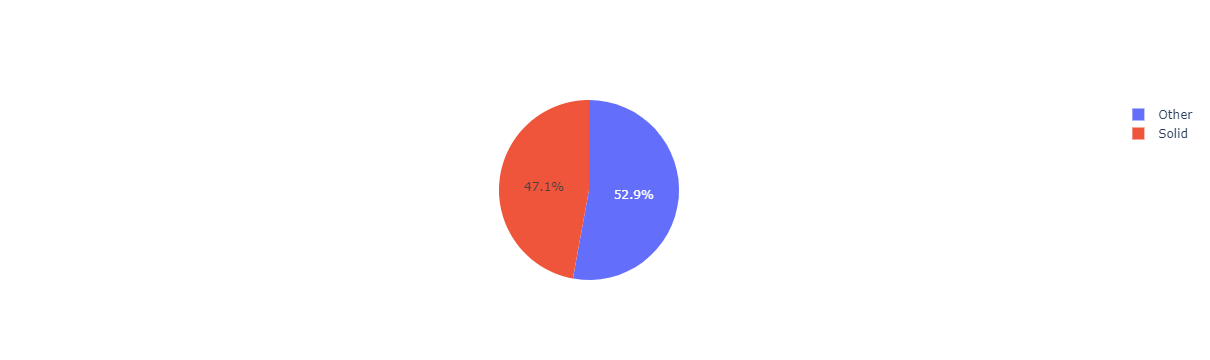

In [162]:
fig = go.Figure(data=[go.Pie(labels=df.SolidOrOther, values=df.articles_count)])
fig.show()

In [198]:
#potentially encode group the following group 
section = articles_df.groupby('section_name')['article_id'].nunique().sort_values(ascending=False)
df = pd.DataFrame({'section_name': section.index,
                   'articles_count': section.values
                  })
df.head(10)

section_name  articles_count
0     Womens Everyday Collection            7295
1             Divided Collection            7124
2  Baby Essentials & Complements            4932
3                      Kids Girl            4469
4                     Young Girl            3899
5                Womens Lingerie            3598
6       Girls Underwear & Basics            3490
7               Womens Tailoring            3376
8                       Kids Boy            3328
9       Womens Small accessories            3270

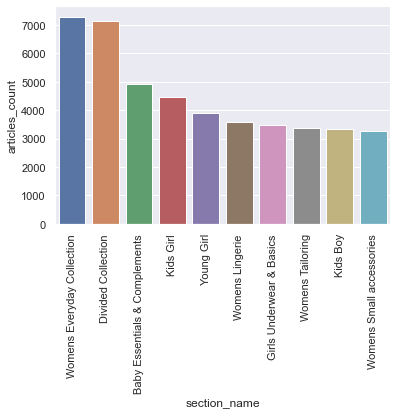

In [175]:
p = sns.barplot(x="section_name", y='articles_count', data=df.head(10))
plt.xticks(rotation=90)
plt.show()

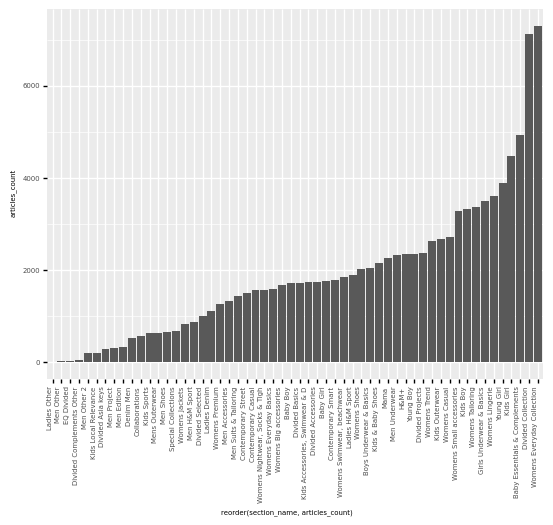

<ggplot: (132477359848)>

In [186]:
(ggplot(df, aes('reorder(section_name, articles_count)','articles_count'))
        + geom_col()
        + theme(text = element_text(size=5),axis_text_x=element_text(rotation=90, hjust=1))
)

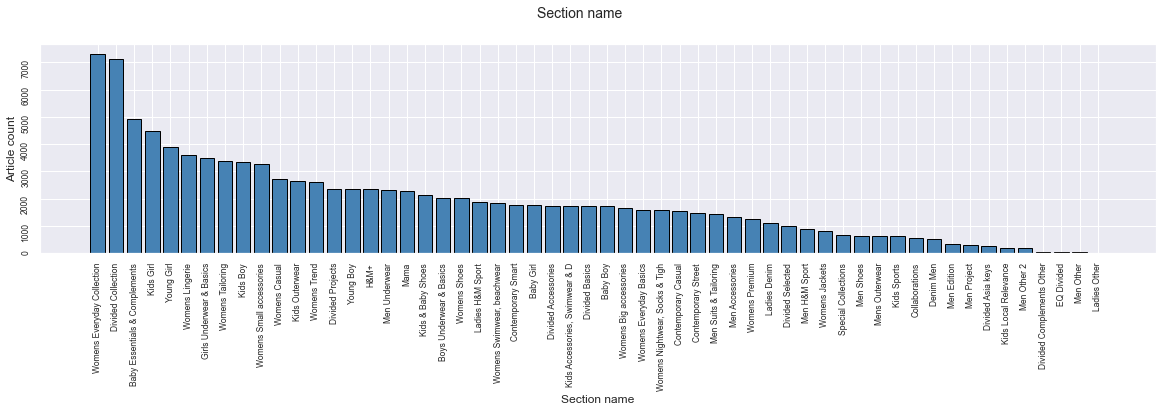

In [207]:
# Bar Plot
fig = plt.figure(figsize = (20, 4))
title = fig.suptitle("Section name", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("Section name")
ax.set_ylabel("Article count") 
ax.tick_params(axis='both', which='major', labelsize=8.5,labelrotation=90)

bar = ax.bar(df.section_name, df.articles_count, color='steelblue', 
        edgecolor='black', linewidth=1)

In [209]:
temp = articles_df.groupby(["product_type_name"])["article_id"].nunique()
df = pd.DataFrame({'Product_Type': temp.index,
                   'Articles': temp.values
                  })
df = df.sort_values(['Articles'], ascending=False)
df

Product_Type  Articles
112      Trousers     11169
32          Dress     10362
100       Sweater      9302
105       T-shirt      7904
108           Top      4155
..            ...       ...
16   Bra extender         1
9         Blanket         1
110         Towel         1
129    Wood balls         1
29        Cushion         1

[131 rows x 2 columns]

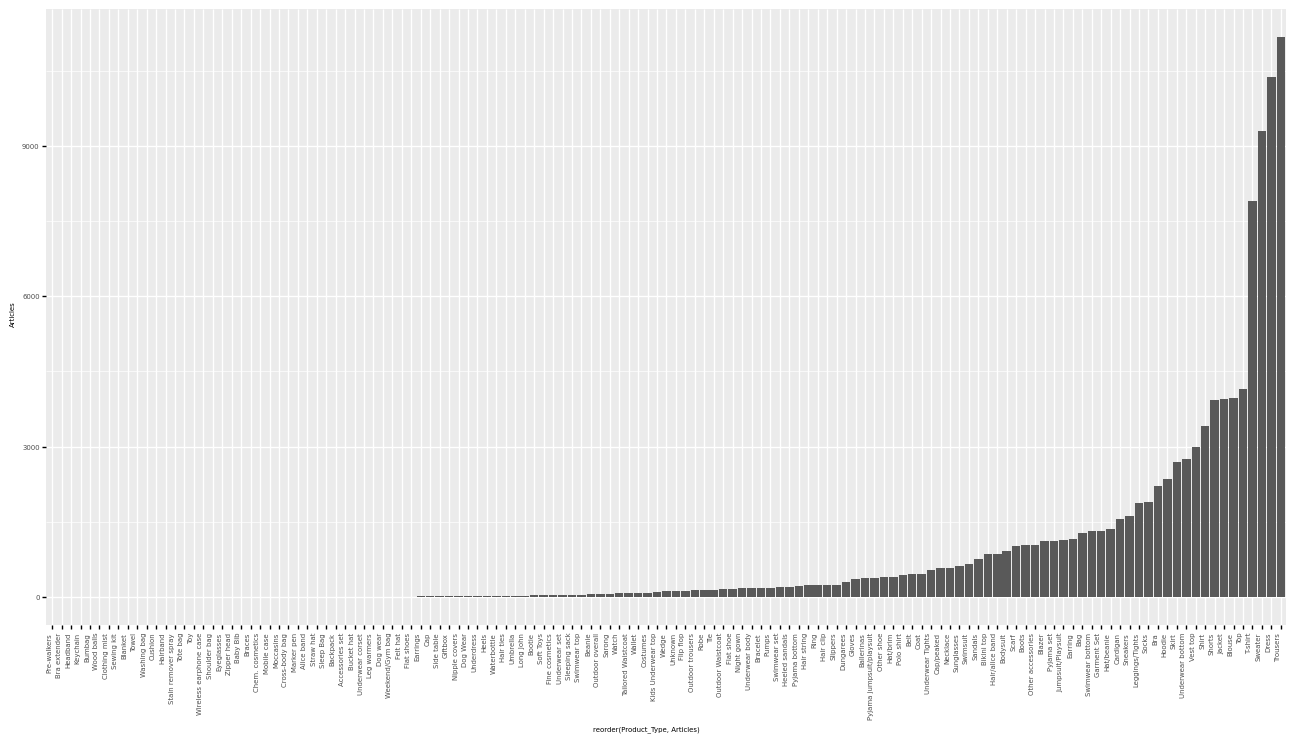

<ggplot: (132521451885)>

In [210]:
(ggplot(df, aes('reorder(Product_Type, Articles)','Articles'))
        + geom_col()
        + theme(text = element_text(size=5),
                axis_text_x=element_text(rotation=90, hjust=1),
                figure_size=(16, 8)
               )
)

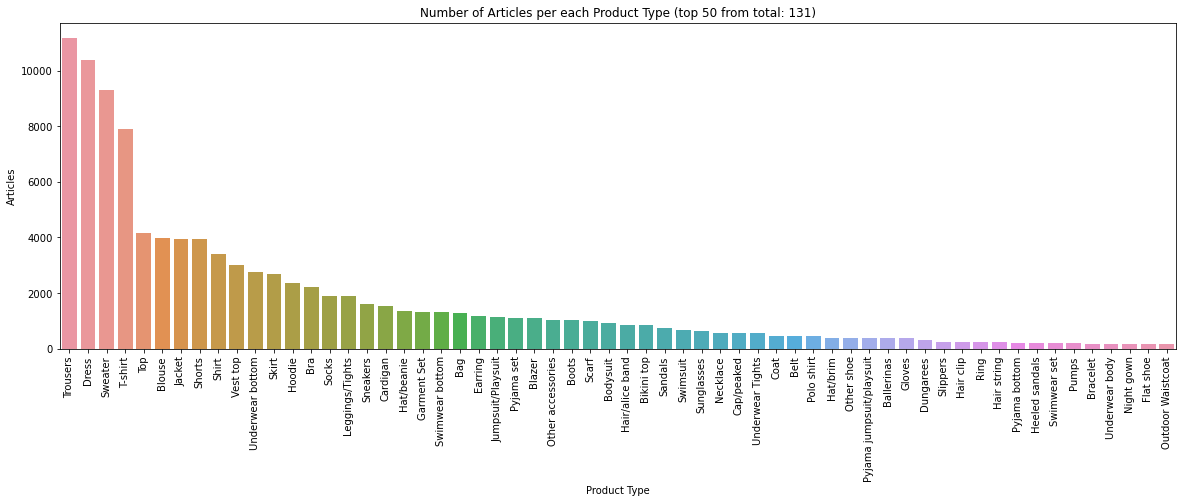

In [48]:
temp = articles_df.groupby(["product_type_name"])["article_id"].nunique()
df = pd.DataFrame({'Product Type': temp.index,
                   'Articles': temp.values
                  })
total_types = len(df['Product Type'].unique())
df = df.sort_values(['Articles'], ascending=False)[0:60]
plt.figure(figsize = (20,6))
plt.title(f'Number of Articles per each Product Type (top 50 from total: {total_types})')
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Product Type', y="Articles", data=df)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()

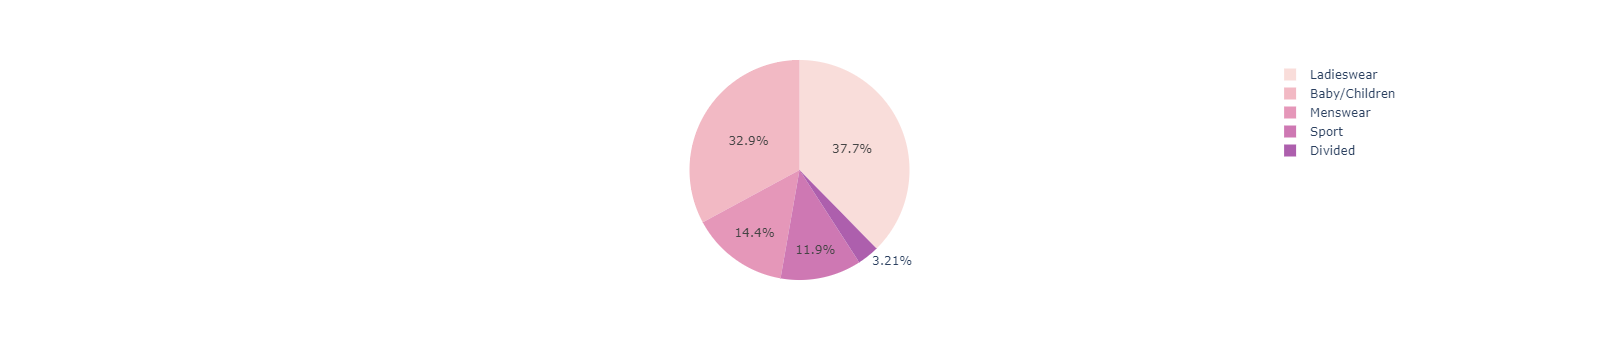

In [49]:
import plotly.express as px
label = articles_df.index_group_name.unique()
count = articles_df.index_group_name.value_counts()

fig = px.pie(articles_df, values=count, names=label,color_discrete_sequence=px.colors.sequential.Purpor)
fig.show()

In [50]:
count


Ladieswear       39737
Baby/Children    34711
Divided          15149
Menswear         12553
Sport             3392
Name: index_group_name, dtype: int64

In [51]:
label

array(['Ladieswear', 'Baby/Children', 'Menswear', 'Sport', 'Divided'],
      dtype=object)

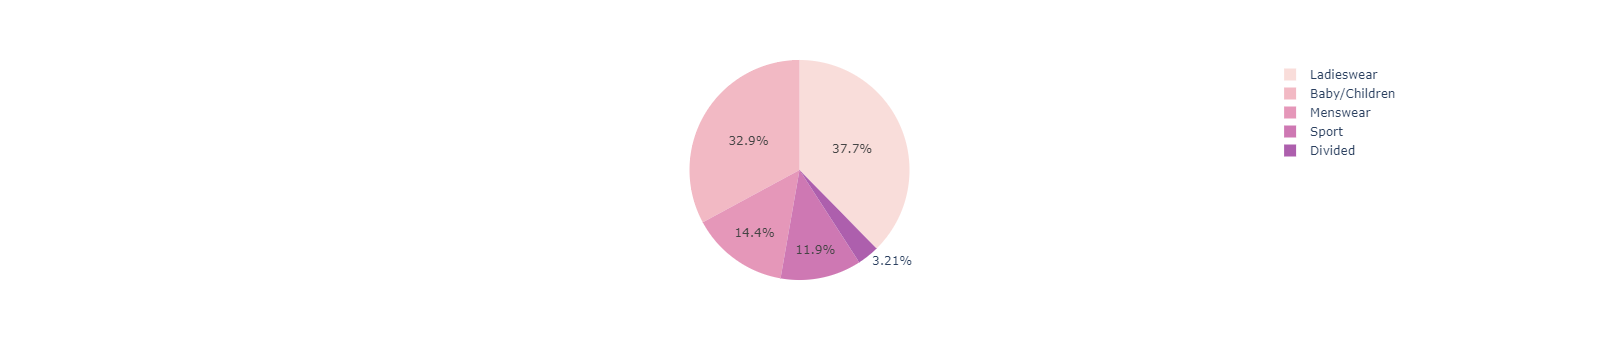

In [52]:
pie = px.pie(articles_df, values=count, names=label,color_discrete_sequence=px.colors.sequential.Purpor)
pie.show()

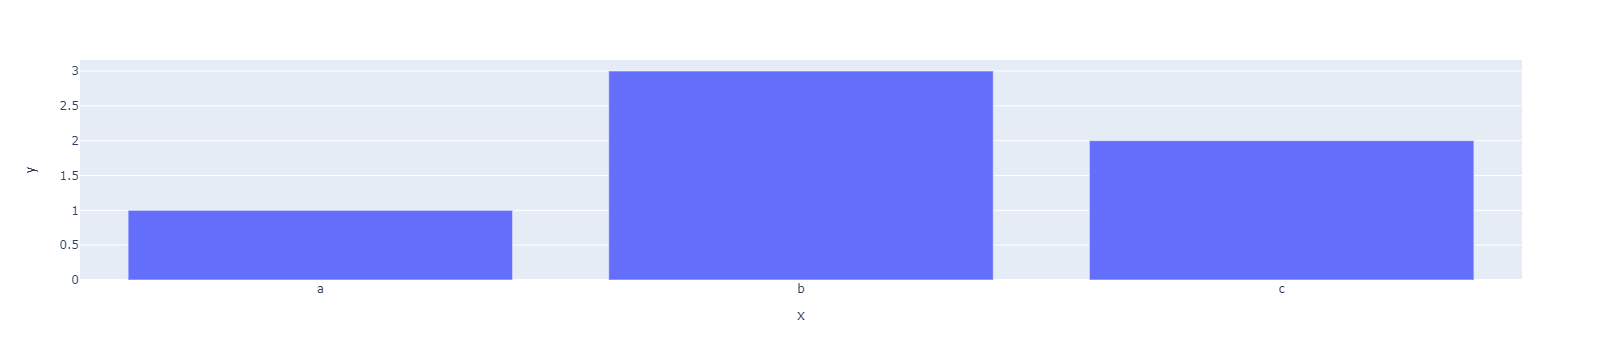

In [53]:
import plotly.express as px
fig = px.bar(x=["a", "b", "c"], y=[1, 3, 2])
fig.show()

In [54]:
temp = articles_df.groupby(["department_name"])["article_id"].nunique()
df = pd.DataFrame({'Department_Name': temp.index,
                   'Articles': temp.values
                  })
df

Department_Name  Articles
0                AK Bottoms        90
1      AK Dresses & Outdoor        87
2                  AK Other        33
3    AK Tops Jersey & Woven        42
4          AK Tops Knitwear        28
..                      ...       ...
245        Young Girl Shoes       287
246     Young Girl Swimwear       175
247      Young Girl Trouser       408
248        Young Girl UW/NW       499
249      Young boy Swimwear       114

[250 rows x 2 columns]

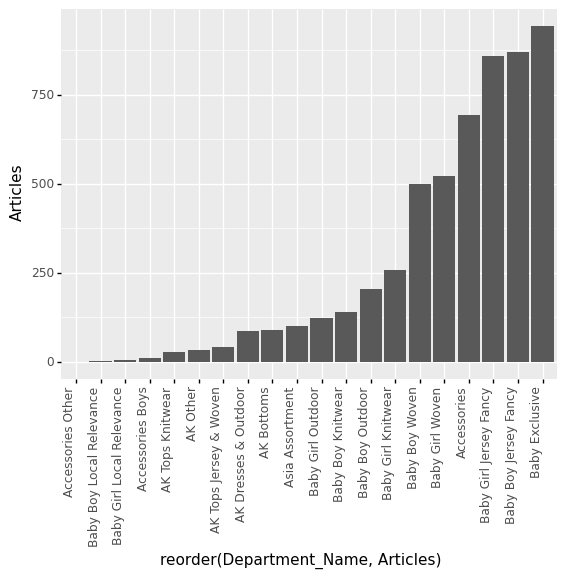

<ggplot: (132521388701)>

In [55]:
(ggplot(df.head(20), aes('reorder(Department_Name, Articles)','Articles'))
        + geom_col()
        + theme(axis_text_x=element_text(rotation=90, hjust=1))
)

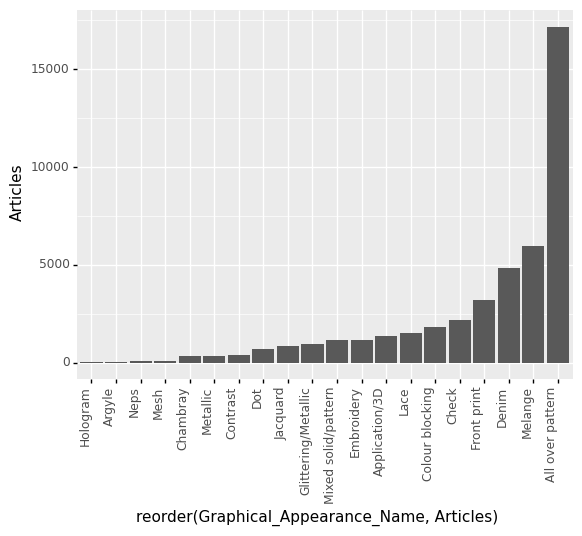

<ggplot: (132521438561)>

In [56]:
temp = articles_df.groupby(["graphical_appearance_name"])["article_id"].nunique()
df = pd.DataFrame({'Graphical_Appearance_Name': temp.index,
                   'Articles': temp.values
                  })

(ggplot(df.head(20), aes('reorder(Graphical_Appearance_Name, Articles)','Articles'))
        + geom_col()
        + theme(axis_text_x=element_text(rotation=90, hjust=1))
)

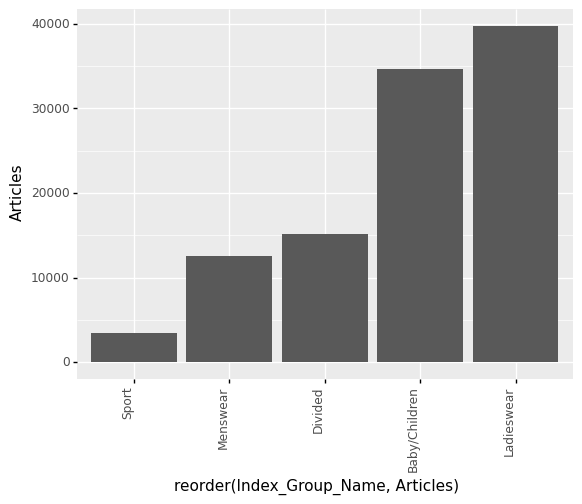

<ggplot: (132520096208)>

In [57]:
temp = articles_df.groupby(["index_group_name"])["article_id"].nunique()
df = pd.DataFrame({'Index_Group_Name': temp.index,
                   'Articles': temp.values
                  })

(ggplot(df, aes('reorder(Index_Group_Name, Articles)','Articles'))
        + geom_col()
        + theme(axis_text_x=element_text(rotation=90, hjust=1))
)

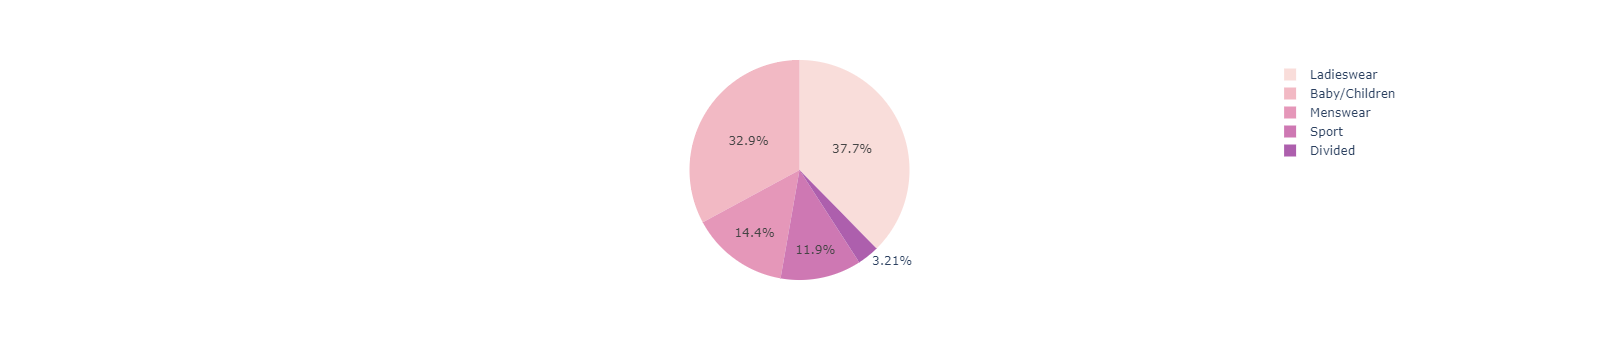

In [58]:
pie = px.pie(df, values=count, names=label,color_discrete_sequence=px.colors.sequential.Purpor)
pie.show()

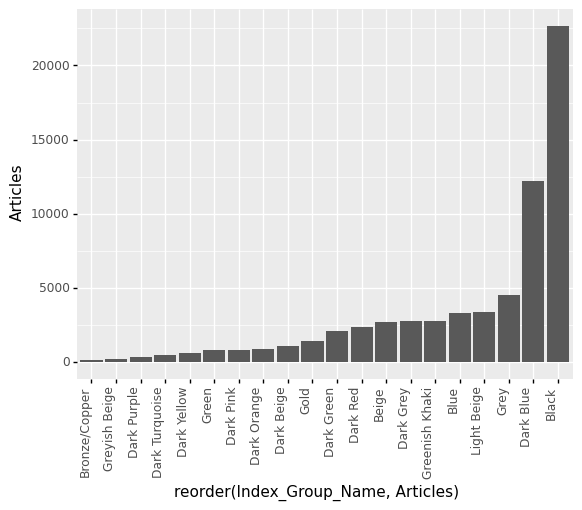

<ggplot: (132521402091)>

In [59]:
temp = articles_df.groupby(["colour_group_name"])["article_id"].nunique()
df = pd.DataFrame({'Index_Group_Name': temp.index,
                   'Articles': temp.values
                  })

(ggplot(df.head(20), aes('reorder(Index_Group_Name, Articles)','Articles'))
        + geom_col()
        + theme(axis_text_x=element_text(rotation=90, hjust=1))
)

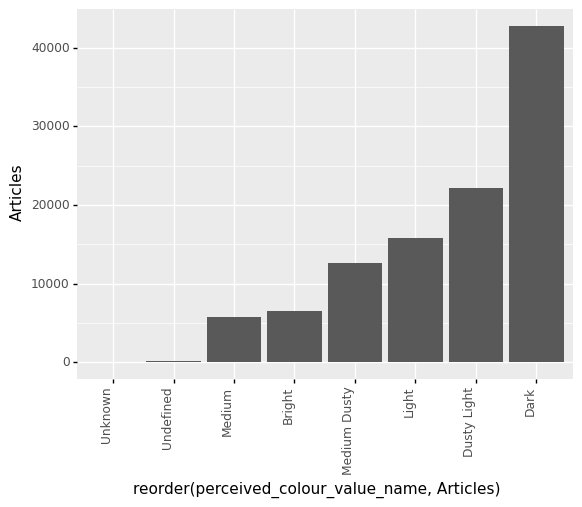

<ggplot: (132521542000)>

In [60]:
temp = articles_df.groupby(["perceived_colour_value_name"])["article_id"].nunique()
df = pd.DataFrame({'perceived_colour_value_name': temp.index,
                   'Articles': temp.values
                  })

(ggplot(df.head(20), aes('reorder(perceived_colour_value_name, Articles)','Articles'))
        + geom_col()
        + theme(axis_text_x=element_text(rotation=90, hjust=1))
)